# **HYPOTHESIS TESTING**

## **PARAMETRIC TEST**

### CONDITIONS

**Pour effectuer un test d'hypothèse et avoir la certitude que le résultat est juste**, un échantillon doit répondre à *trois exigences*:

**1.** il s'agit d'un échantillon aléatoire de la population,<br>
**2.** les observations sont indépendantes et<br>
**3.** le nombre d'observations est suffisant. Parmi ces conditions, seule la dernière est facilement testable avec du code.

- Pour un *Test t à deux échantillons*, la taille doit être supérieur ou égale à 30. 
> <code># check dataset size <br> len(df) >= 30</code>

- Pour un *Test de proportion à un échantillon*, la taille doit être supérieur ou égale à 10
> <code># check dataset size <br> len(df) >= 10</code>

- Pour un *Test d'indépendance KHI2*, la taille doit être supérieur ou égale à 5
> <code># check dataset size <br> len(df) >= 5</code>

- Pour un *Test ANOVA*, la taille doit être supérieur ou égale à 30
> <code># check dataset size <br> len(df) >= 30</code>

In [116]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils.utils import *

***z statistic** is used when using one sample statistic to estimate a population parameter*

***t statistic** is used when using multiple sample statistic to estimate a population parameter*

In [117]:
# Read the data
data = pd.read_feather("stack_overflow.feather")
# show the first 5 rows
# print(data.head())

# print column names
columns = list(data.columns)
print(columns)

# Filter columns that contain 'age'
# columns = [col for col in columns if 'age' in col]
columns = search_string_in_columns(df=data, search_string='age')

print(columns)

['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code', 'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp', 'country', 'currency_desc', 'currency_symbol', 'database_desire_next_year', 'database_worked_with', 'dev_type', 'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors', 'job_sat', 'job_seek', 'language_desire_next_year', 'language_worked_with', 'misc_tech_desire_next_year', 'misc_tech_worked_with', 'new_collab_tools_desire_next_year', 'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt', 'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn', 'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime', 'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck', 'op_sys', 'org_size', 'platform_desire_next_year', 'platform_worked_with', 'purchase_what', 'sexuality', 'so_account', 'so_comm', 'so_part_freq', 'so_visit_freq', 'survey_ease', 'survey_length', 'trans', 'undergrad_major', 'webframe_desire_next_yea

**SCORE Z: COMPARE SAMPLE STATISTICS ACCROS ON GROUP OF VARIABLE**

In [118]:
# Calculate the mean and standard deviation of the salary
col = 'converted_comp'
mean_salary = data[col].mean()
std_salary = data[col].std()
print(f"Mean salary: {mean_salary}")
print(f"Standard deviation of salary: {std_salary}")

# Calculate Z-scores
data["z_score"] = (data[col] - mean_salary) / std_salary
# print the first 5 rows
print(data["z_score"].head())


Mean salary: 119574.71738168952
Standard deviation of salary: 265556.0729116986
0   -0.158229
1   -0.167967
2    1.788565
3    7.081086
4   -0.307877
Name: z_score, dtype: float64


In [119]:
num_col = 'converted_comp'
cat_col = 'age_first_code_cut'
data.select_dtypes('category').columns
# Convert the categorical column to a category type
data[cat_col] = data[cat_col].astype('category')

data.select_dtypes('category').columns

Index(['age_first_code_cut', 'job_sat'], dtype='object')

**TEST T: COMPARE SAMPLE STATISTICS ACCROS GROUPS OF VARIABLE (2 GROUPS)**

In [120]:
# ARE USERS WHO FIRST PROGRAMMED AS CHILD COMPENSATED HIGHER THAN THOSE THAT STARTED AS ADULTS ?

# NULL HYPOTHESIS: The mean compensation is the same for those who started programming as children and those who started as adults.
# ALTERNATIVE HYPOTHESIS: The mean compensation is greater than the mean for those who started programming as children and those who started as adults.
# 


In [121]:
# age_first_code_cut summary statistics
age_first_code_cut = data[cat_col].value_counts()
print(age_first_code_cut)

draw_stars_line()

# mean salary for each group
mean_salary = data.groupby(cat_col, observed=True)[num_col].mean()
print(mean_salary)

age_first_code_cut
adult    1376
child     885
Name: count, dtype: int64


**************************************************

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64


In [122]:
mean_salary = data.groupby(cat_col, observed=True)[num_col].mean().reset_index()
print(mean_salary)
draw_stars_line()
std_salary = data.groupby(cat_col, observed=True)[num_col].std().reset_index()
# count_group = data.groupby(cat_col, observed=True)[num_col].count()
print(std_salary)
draw_stars_line()

count_group = data[cat_col].value_counts().reset_index()
print(count_group)

print(count_group.iloc[0,1])



  age_first_code_cut  converted_comp
0              adult   111313.311047
1              child   132419.570621


**************************************************

  age_first_code_cut  converted_comp
0              adult   271546.521729
1              child   255585.240115


**************************************************

  age_first_code_cut  count
0              adult   1376
1              child    885
1376


In [123]:
# Calculate T statistic
# T statistic = (mean1 - mean2) / sqrt((std1^2/n1) + (std2^2/n2))

numerator = mean_salary.iloc[1,1] - mean_salary.iloc[0,1]
print(numerator)
draw_stars_line()

denominator = np.sqrt((std_salary.iloc[0,1]**2/count_group.iloc[0,1]) + (std_salary.iloc[1,1]**2/count_group.iloc[1,1]))

print(denominator)
draw_stars_line()

t_statistic = numerator / denominator
print("t statistic is: ", t_statistic)

# Calculate the degrees of freedom
# degrees of freedom = n1 + n2 - 2
df = count_group.iloc[0,1] + count_group.iloc[1,1] - 2
print("degrees of freedom is: ", df)

# Calculate the critical value
# critical value = t.ppf(1 - alpha, df)
from scipy.stats import t
alpha = 0.05


# Calculate the p-value
# p-value = 1 - t.cdf(t_statistic, df)
p_value = 1 - t.cdf(t_statistic, df) #cdf = cumulative distribution function
print("p-value is: ", p_value)

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

21106.25957495728


**************************************************

11287.18430352594


**************************************************

t statistic is:  1.8699313316221844
degrees of freedom is:  2259
p-value is:  0.030811302165157595
Reject the null hypothesis


**PAIRED T TEST: COMPARE SAMPLE STATISTICS ACCROS MULTIPLE GROUP OF VARIABLE**

In [ ]:
# Import dataset
repub_08_12 = pd.read_feather('repub_votes_potus_08_12.feather')
repub_votes_small = repub_08_12
dem_12_16 = pd.read_feather('dem_votes_potus_12_16.feather')
sample_dem_12_16 = dem_12_16
# Show the first 5 rows
print(repub_votes_small.head())
draw_stars_line()
print(sample_dem_12_16.head())

        state   county  repub_percent_08  repub_percent_12
0     Alabama     Hale         38.957877         37.139882
1    Arkansas   Nevada         56.726272         58.983452
2  California     Lake         38.896719         39.331367
3  California  Ventura         42.923190         45.250693
4    Colorado  Lincoln         74.522569         73.764757


**************************************************

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546


        state   county  repub_percent_08  repub_percent_12      diff
0     Alabama     Hale         38.957877         37.139882  1.817995
1    Arkansas   Nevada         56.726272         58.983452 -2.257179
2  California     Lake         38.896719         39.331367 -0.434648
3  California  Ventura         42.923190         45.250693 -2.327503
4    Colorado  Lincoln         74.522569         73.764757  0.757812


**************************************************



Text(0.5, 1.0, 'Distribution of the difference between 2008 and 2012 Republican votes')

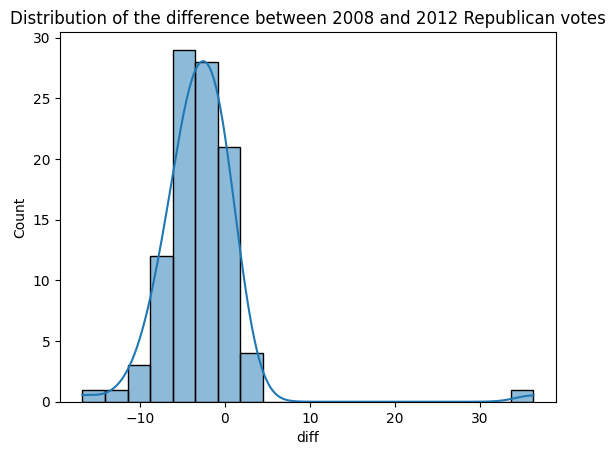

In [ ]:
# USE THE sample_repub_08_12 TO MAKE PAIRES T TEST

#Add difference column
rep_08 = 'repub_percent_08'
rep_12 = 'repub_percent_12'
repub_votes_small['diff'] = repub_votes_small[rep_08] - repub_votes_small[rep_12]
# Show the first 5 rows
print(repub_votes_small.head())
draw_stars_line()

# show the distribution of the difference

sns.histplot(repub_votes_small['diff'], bins=20, kde=True)
# sns.kdeplot(sample_repub_08_12['diff'], color='red')
plt.title('Distribution of the difference between 2008 and 2012 Republican votes')
 


In [ ]:
# difference summary statistics
diff_summary = repub_votes_small['diff'].describe()
print(diff_summary)

xbar_diff = diff_summary['mean']
# or xbar_diff = sample_repub_08_12['diff'].mean()
print("xbar_diff: ", xbar_diff)
draw_stars_line()
std_diff = diff_summary['std']
# or s = sample_repub_08_12['diff'].std()
print("std_diff: ", std_diff)
draw_stars_line()
n = diff_summary['count']
# or n = sample_repub_08_12['diff'].count()
# or n = len(sample_repub_08_12['diff'])
# or n = len(sample_repub_08_12)
print("n: ", n)
draw_stars_line()

# Calculate T statistic
# T statistic = (xbar_diff - 0) / (std_diff / sqrt(n))
numerator = xbar_diff - 0
print("numerator: ", numerator)
denominator = std_diff / np.sqrt(n)
print("denominator: ", denominator)
t_statistic = numerator / denominator
print("t statistic is: ", t_statistic)

# p-value
# p-value = 1 - t.cdf(t_statistic, n-1)
from scipy.stats import t
alpha = 0.05
# Calculate the degrees of freedom
df = n - 1
print("degrees of freedom is: ", df)
# Calculate the p-value
p_value = t.cdf(t_statistic, df)
print("p-value is: ", p_value)

count    100.000000
mean      -2.877109
std        5.136738
min      -16.730398
25%       -4.966043
50%       -3.052331
75%       -0.786672
max       36.273633
Name: diff, dtype: float64
xbar_diff:  -2.877109041242944


**************************************************

std_diff:  5.136737887231852


**************************************************

n:  100.0


**************************************************

numerator:  -2.877109041242944
denominator:  0.5136737887231851
t statistic is:  -5.601043121928489
degrees of freedom is:  99.0
p-value is:  9.572537285272411e-08


In [ ]:
# Do same using pingouin library
import pingouin as pg
# Perform a paired t-test
t_test = pg.ttest(x=repub_votes_small['diff'], y=0, alternative='less')
print(t_test)
draw_stars_line()
print(t_test['p-val'].values[0])
# or
t_test2 = pg.ttest(x=repub_votes_small[rep_08], y=repub_votes_small[rep_12], paired=True, alternative='less')
print(t_test2)

               T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.560104   

             BF10     power  
T-test  1.323e+05  0.999955  


**************************************************

9.572537285272479e-08
               T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.217364   

             BF10     power  
T-test  1.323e+05  0.696338  


**ANOVA TEST**

['job_factors', 'job_sat', 'job_seek', 'new_job_hunt', 'new_job_hunt_research']
job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

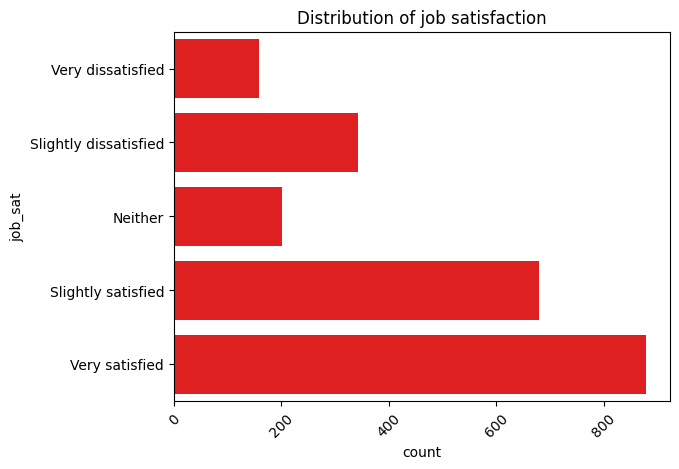

In [128]:
data.columns
print(search_string_in_columns(df=data, search_string='job'))

# MAKE ANOVA TEST WITH job_sat COLUMN
# job_sat = 'job_satisfaction'
job_sat = 'job_sat'
print(data[job_sat].value_counts(sort=True))

#Visualize the data
# sns.histplot(data[job_sat], bins=20, kde=True)
sns.countplot( data[job_sat], color='red')
plt.title('Distribution of job satisfaction')
plt.xticks(rotation=45)




<Axes: xlabel='converted_comp', ylabel='job_sat'>

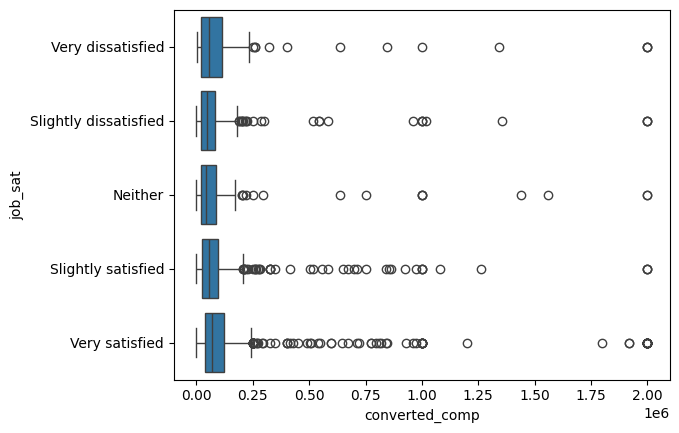

In [129]:
# visualize distribution of job satisfaction by job
sns.boxplot(y=job_sat, x='converted_comp', data=data)

In [130]:
# Anova test
# Null hypothesis: The means of the groups are equal
# Alternative hypothesis: At least one group mean is different
# ANOVA test
anova = pg.anova(data=data, dv='converted_comp', between= job_sat)
print(anova)
print(type(anova))

    Source  ddof1  ddof2         F     p-unc       np2
0  job_sat      4   2256  4.480485  0.001315  0.007882
<class 'pandas.core.frame.DataFrame'>


In [ ]:
diff_summary = repub_votes_small['diff'].describe()
print(diff_summary)

count    100.000000
mean      -2.877109
std        5.136738
min      -16.730398
25%       -4.966043
50%       -3.052331
75%       -0.786672
max       36.273633
Name: diff, dtype: float64


**TEST KHI2**

['age', 'age_1st_code', 'age_first_code_cut', 'language_desire_next_year', 'language_worked_with', 'age_cat']
job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64


**************************************************

age_cat                At least 30  Under 30
job_sat                                     
Very dissatisfied         0.490566  0.509434
Slightly dissatisfied     0.467836  0.532164
Neither                   0.432836  0.567164
Slightly satisfied        0.435294  0.564706
Very satisfied            0.

<Axes: xlabel='job_sat'>

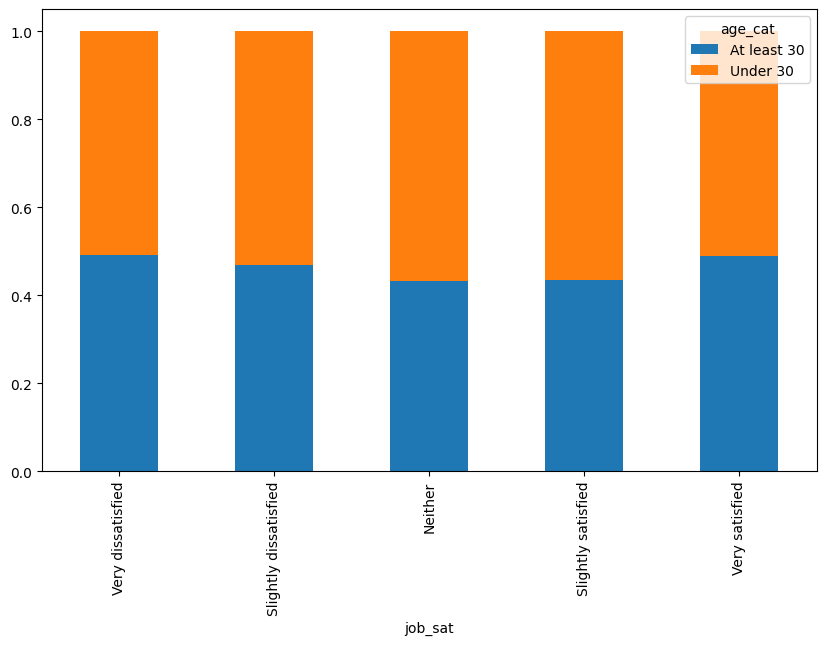

In [132]:
# proportion test
print(search_string_in_columns(df=data, search_string='age'))
age_cat = 'age_cat'
props = data.groupby(job_sat, observed=False)[age_cat].value_counts(normalize=True)
print(props)
draw_stars_line()
props_wide = props.unstack()
print(props_wide) 

draw_stars_line()

# Visualize the data
props_wide.plot(kind='bar', stacked=True, figsize=(10, 6))


In [133]:
# chi-square independence test
# Null hypothesis: The two variables are independent
# Alternative hypothesis: The two variables are not independent
# Chi-square test
excepted, observed, stats = pg.chi2_independence(data, x=job_sat, y=age_cat)

print(stats)

p_value = stats['pval']
print(p_value)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419
0    0.235164
1    0.235014
2    0.234632
3    0.234274
4    0.233854
5    0.232828
Name: pval, dtype: float64


**TEST D'ADEQUATION DU KHI2**

In [134]:
purple_link_counts = data['purple_link'].value_counts()
print(purple_link_counts)
draw_stars_line()


purple_link_counts = purple_link_counts.reset_index().sort_values(by='purple_link')
purple_link_counts.columns = ['purple_link', 'n']
print(purple_link_counts)
draw_stars_line()



purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64


**************************************************

         purple_link     n
2             Amused   368
3            Annoyed   263
0  Hello, old friend  1225
1        Indifferent   405


**************************************************



<Axes: xlabel='purple_link', ylabel='n'>

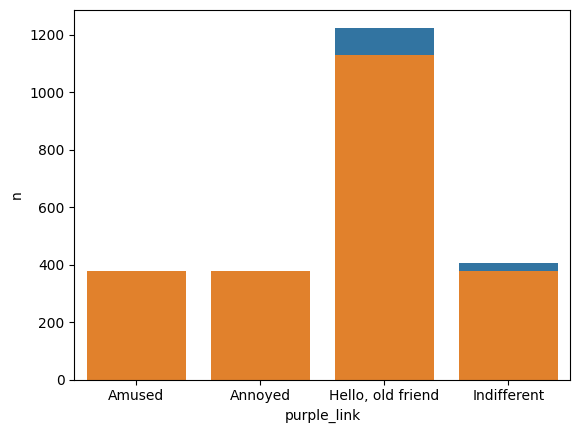

In [135]:
# Visualize the data
sns.barplot(x='purple_link', y='n', data=purple_link_counts)
sns.barplot(x='purple_link', y='n', data=hypothesized)

In [ ]:
# Hypothesis test

hypothesized = pd.DataFrame(
    {
        'purple_link': list(purple_link_counts['purple_link']),
        'prop': [1/6, 1/6, 1/2, 1/6],
    }
)
hypothesized['n'] = hypothesized['prop'] * len(data)
print(hypothesized)

# Chi-square test
# Null hypothesis: The observed proportions are equal to the hypothesized proportions
# Alternative hypothesis: The observed proportions are not equal to the hypothesized proportions
# Chi-square test 
from scipy.stats import chisquare
# chisquare(f_obs, f_exp)
# f_obs = observed frequencies
# f_exp = expected frequencies
chi2, p_value = chisquare(
    f_obs=purple_link_counts['n'],
    f_exp=hypothesized['n'],
)
print("chi2: ", chi2)
print("p_value: ", p_value)

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333
chi2:  44.59840778416629
p_value:  1.1261810719413759e-09


## **NON PARAMETRIC TEST**

In [147]:
# List elements Rank
from scipy.stats import rankdata
# rankdata(a, method='average', axis=0, nan_policy='propagate')
# a: array_like
a = [1, 15, 3, 10, 6]
ranks = rankdata(a)
print(ranks)

[1. 5. 2. 4. 3.]


**WILCOXON TEST**

In [ ]:
# WILCOXON TEST
from scipy.stats import wilcoxon

# sample data from repub_08_12 dataset
repub_votes_small = repub_08_12.sample(n=5, random_state=1)
print(repub_votes_small)

#add difference column
repub_votes_small['diff'] = repub_votes_small[rep_08] - repub_votes_small[rep_12]

# add absolute difference column
repub_votes_small['abs_diff'] = abs(repub_votes_small['diff'])
print(repub_votes_small)
draw_stars_line()

# add ranks column
repub_votes_small['ranks_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)


            state      county  repub_percent_08  repub_percent_12      diff
80          Texas   Red River         68.507522         69.944817 -1.437295
84          Texas      Walker         60.707197         64.971903 -4.264705
33       Kentucky      Powell         57.059533         61.727293 -4.667760
81          Texas  Schleicher         74.386503         77.384464 -2.997961
93  West Virginia      Morgan         60.857614         64.068711 -3.211097
            state      county  repub_percent_08  repub_percent_12      diff  \
80          Texas   Red River         68.507522         69.944817 -1.437295   
84          Texas      Walker         60.707197         64.971903 -4.264705   
33       Kentucky      Powell         57.059533         61.727293 -4.667760   
81          Texas  Schleicher         74.386503         77.384464 -2.997961   
93  West Virginia      Morgan         60.857614         64.068711 -3.211097   

    abs_diff  
80  1.437295  
84  4.264705  
33  4.667760  
81  2.997

In [164]:
# wilcoxon test with scipy
# Null hypothesis: The median of the differences is equal to 0
# Alternative hypothesis: The median of the differences is not equal to 0
# wilcoxon(x, y=None, zero_method='zsplit', alternative='two-sided', mode='auto')
w_val, p_val = wilcoxon(
    x=repub_votes_small[rep_08],
    y=repub_votes_small[rep_12],
    alternative='less', # 'two-sided', 'greater', 'less'
)

print("w_val: ", w_val)
print("p_val: ", p_val)

draw_stars_line()

# or using pingouin
t_test = pg.wilcoxon(
    x=repub_votes_small[rep_08],
    y=repub_votes_small[rep_12],
    alternative='less', # 'two-sided', 'greater', 'less'
)
print(t_test)



w_val:  0.0
p_val:  0.03125


**************************************************

          W-val alternative    p-val  RBC  CLES
Wilcoxon    0.0        less  0.03125 -1.0  0.72


**WILCOXON-MANN-WHITNEY TEST**

In [173]:
# WILCOXON-MANN-WHITNEY TEST
age_cat = 'age_first_code_cut'
converted_comp = 'converted_comp'

# Data for the test using the age_cat and converted_comp columns of stack_overflow dataset
age_vs_comp = data[[converted_comp, age_cat]]
print(age_vs_comp.head())

draw_stars_line()

# age_vs_comp to wide format
age_vs_comp_wide = age_vs_comp.pivot(columns=age_cat, values=converted_comp)
print(age_vs_comp_wide.head())
alpha = 0.01
# Wilcoxon-Mann-Whitney test
# Null hypothesis: The distributions of the two groups are equal
# Alternative hypothesis: The distributions of the two groups are not equal
# mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')*
# Run the test with pingouin
t_test = pg.mwu(
    x=age_vs_comp_wide['child'],
    y=age_vs_comp_wide['adult'],
    alternative='greater', # 'two-sided', 'greater', 'less'
)
print(t_test)





   converted_comp age_first_code_cut
0         77556.0              adult
1         74970.0              child
2        594539.0              child
3       2000000.0              adult
4         37816.0              adult


**************************************************

age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN
        U-val alternative         p-val       RBC      CLES
MWU  744365.5     greater  1.902723e-19  0.222516  0.611258
